# WeatherPy
----

## Observable Trends and Anylsis:

* As expected, temperatures generally tend to increase corresponding to a shift closer to the equator; the coldest temperatures are prevalent in the Northen Hemisphere at latitudes furthest from the equator (i.e. closest to the North Pole). Temperatures in the Southern Hemisphere tend to shift more graduallay and plateatu even as they shift further south from the equator, as the Southern Hemisphere's prevalance of ocean water tends to create generally milder climates. There are also likely far fewer data points (cities) to measure approaching the South Pole.
* There are relatively weak correlations (low relative r-values) for both cloudiness and wind speed in relation to latitude. This is also logical as these measures tend to be more affected by atmospheric and geographic factors specific to various regions.
* Humidity has a slightly stronger (higher relative r-values) positive correlation relative to latitude for both Hemispheres; surprisingly the correlation is actually slightly stronger in the Northern Hemisphere, meaning cities farther north away from the equator actually had slightly higher relative humidities. This may have to do with the diminished ability of colder air to hold moisture, creating higher levels of relative humidity even with less overall moisture in the air.

In [1]:
# Dependencies and Setup
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from api_keys import weather_api_key
from citipy import citipy
from datetime import date
import scipy.stats as st
from scipy.stats import linregress

# Set variables for today's date
today = date.today()
today_date = today.strftime("%m/%d/%y")

## Generate Cities List

In [2]:
# Create empty lists for holding latitudes/longitudes and cities
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# Append unique city values to cities list
    if city not in cities:
        cities.append(city)

# Print the length of cities list to confirm sufficient data
len(cities)

601

In [3]:
# Display the first ten values of the cities list to confirm formatting
cities[:10]

['ribeira grande',
 'kapaa',
 'mehamn',
 'bethel',
 'praya',
 'aranos',
 'mitu',
 'ushuaia',
 'cherskiy',
 'luderitz']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# URL for GET requests to retrieve weather data
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set units for degrees to Fahrenheit
units = "imperial"

# Create empty lists for holding city weather and location data
weather_cities = []
cloudiness = []
country = []
datetime = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print(f"Data Retreival")
print(f"------------------")

# Create for loop for retrieving and storing city weather and loation data
# Create exception handling for "KeyErrors" (i.e. cities for which some values do not exist)
# Print data retrieval log
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        weather_cities.append(response["name"])
        country.append(response["sys"]["country"])
        cloudiness.append(response["clouds"]["all"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        datetime.append(response["dt"])

        print(f"City {city} found, appending data.")

    except KeyError:
        print(f"City {city} not found, nothing to append.")

print(f"------------------")
print(f"End Data Retreival")

Data Retreival
------------------
City ribeira grande found, appending data.
City kapaa found, appending data.
City mehamn found, appending data.
City bethel found, appending data.
City praya found, appending data.
City aranos found, appending data.
City mitu found, appending data.
City ushuaia found, appending data.
City cherskiy found, appending data.
City luderitz found, appending data.
City illoqqortoormiut not found, nothing to append.
City cabo san lucas found, appending data.
City america dourada found, appending data.
City butaritari found, appending data.
City kluang found, appending data.
City raudeberg found, appending data.
City rikitea found, appending data.
City hualmay found, appending data.
City terrace found, appending data.
City barrow found, appending data.
City puerto ayora found, appending data.
City sinnamary found, appending data.
City chinsali found, appending data.
City omsukchan found, appending data.
City geraldton found, appending data.
City rivne found, app

### Convert Raw Data to DataFrame

In [5]:
# Create city weather dictionary
weather_data_dict = {
    "City": weather_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": datetime
} 

# Create and display the city weather data DataFrame
weather_data_df = pd.DataFrame(weather_data_dict)
weather_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,59.0,55,40,13.80,PT,1616520022
1,Kapaa,22.0752,-159.3190,64.4,88,1,8.05,US,1616519735
2,Mehamn,71.0357,27.8492,32.0,93,90,34.52,NO,1616520022
3,Bethel,41.3712,-73.4140,64.4,32,1,3.44,US,1616519886
4,Praia,14.9215,-23.5087,75.2,57,40,20.71,CV,1616520022


In [6]:
# Export the city weather data into a .csv
# Set encoding to "utf-8-sig" to account for proper encoding of special characters
weather_data_df.to_csv("output_data/weather_data_cities.csv", index_label="City_ID", encoding="utf-8-sig")

In [7]:
# Generate a summary statistics table of for the city weather data
weather_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,20.015542,17.390264,57.136184,67.925859,53.949367,8.391103,1.616520e+09
std,33.221439,92.183041,27.924537,23.659954,38.818945,6.072202,9.150804e+01
min,-54.800000,-175.200000,-38.150000,5.000000,0.000000,0.510000,1.616519e+09
25%,-8.188100,-67.145700,42.800000,55.000000,16.000000,4.070000,1.616520e+09
50%,25.519800,21.548200,64.400000,72.000000,60.000000,6.910000,1.616520e+09
75%,47.866700,102.044200,79.030000,87.000000,92.000000,10.850000,1.616520e+09
max,78.218600,179.316700,101.930000,100.000000,100.000000,49.480000,1.616520e+09


## Plotting the Data

## Latitude vs. Temperature Plot

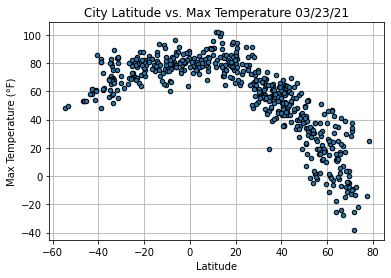

In [8]:
ax = weather_data_df.plot.scatter(x="Lat", y="Max Temp", title=(f"City Latitude vs. Max Temperature {today_date}"), 
                             grid=True, edgecolor="black", linewidth=1)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (°F)")
ax.set_axisbelow(True)

fig = ax.get_figure()
fig.savefig("output_data/Latitude vs. Temperature.svg")

## Latitude vs. Humidity Plot

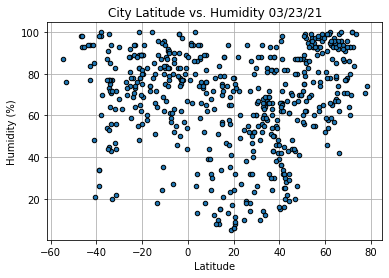

In [9]:
ax2 = weather_data_df.plot.scatter(x="Lat", y="Humidity", title = (f"City Latitude vs. Humidity {today_date}"),
                                   grid=True, edgecolor="black", linewidth=1)
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity (%)")
ax2.set_axisbelow(True)

fig = ax2.get_figure()
fig.savefig("output_data/Latitude vs. Humidity.svg")

## Latitude vs. Cloudiness Plot

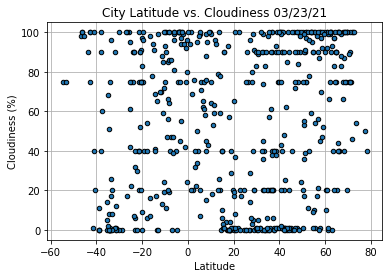

In [10]:
ax3 = weather_data_df.plot.scatter(x="Lat", y="Cloudiness", title = (f"City Latitude vs. Cloudiness {today_date}"),
                                   grid=True, edgecolor="black", linewidth=1)
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness (%)")
ax3.set_axisbelow(True)

fig = ax3.get_figure()
fig.savefig("output_data/Latitude vs. Cloudiness.svg")

## Latitude vs. Wind Speed Plot

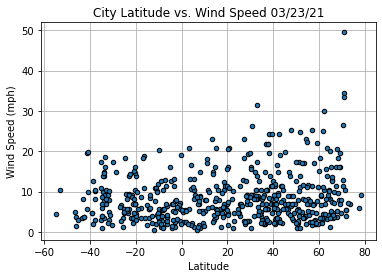

In [11]:
ax4 = weather_data_df.plot.scatter(x="Lat", y="Wind Speed", title = (f"City Latitude vs. Wind Speed {today_date}"),
                                   grid=True, edgecolor="black", linewidth=1)
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed (mph)")
ax4.set_axisbelow(True)

fig = ax.get_figure()
fig.savefig("output_data/Latitude vs. Wind Speed.svg")

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] >= 0]
southern_hemisphere = weather_data_df.loc[weather_data_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

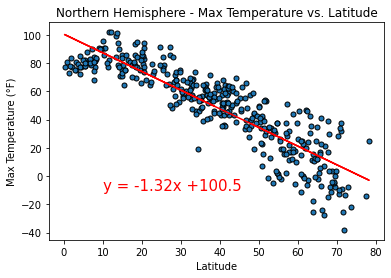

The r-value is -0.8819898287937236


In [13]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values, s=25, edgecolor="black", linewidth=1)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude")
plt.savefig("output_data/Northern Hemisphere - Max Temperature vs. Latitude.svg")
plt.show()

print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

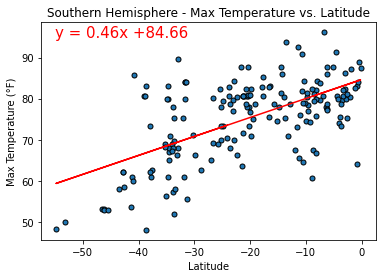

The r-value is 0.6098245862509502


In [21]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values, s=25, edgecolor="black", linewidth=1)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude")
plt.savefig("output_data/Southern Hemisphere - Max Temperature vs. Latitude.svg")
plt.show()

print(f"The r-value is {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

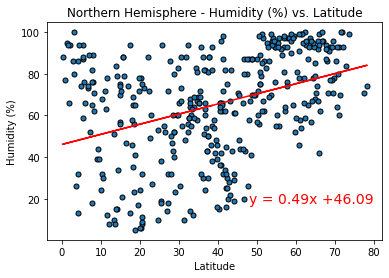

The r-value is 0.37954867675962506


In [15]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values, s=25, edgecolor="black", linewidth=1)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(48,18),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude.svg")
plt.show()

print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

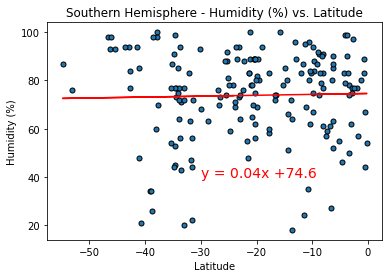

The r-value is 0.02656740893099986


In [22]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values, s=25, edgecolor="black", linewidth=1)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude.svg")
plt.show()

print(f"The r-value is {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

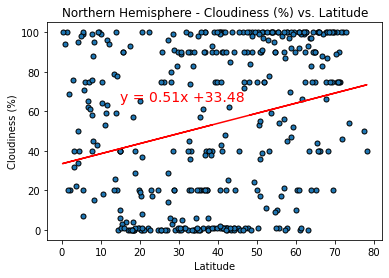

The r-value is 0.257671319779195


In [24]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values, s=25, edgecolor="black", linewidth=1)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(15,65),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.svg")
plt.show()

print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

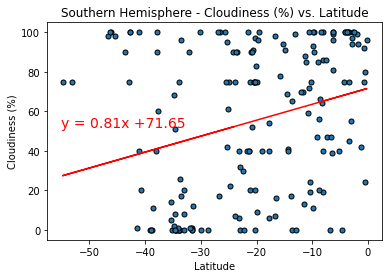

The r-value is 0.27745348082174703


In [27]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values, s=25, edgecolor="black", linewidth=1)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,52),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.svg")
plt.show()

print(f"The r-value is {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

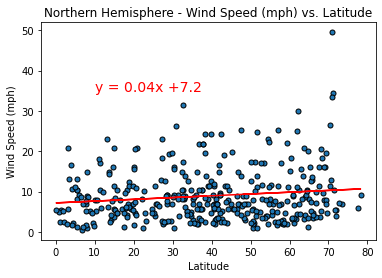

The r-value is 0.1331155439459095


In [28]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values, s=25, edgecolor="black", linewidth=1)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(10, 35),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.svg")
plt.show()

correlation = st.pearsonr(x_values, y_values)

print(f"The r-value is {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

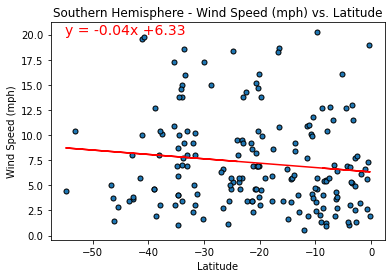

The r-value is -0.12234861244905364


In [29]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values, y_values, s=25, edgecolor="black", linewidth=1)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=14,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")
plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.svg")
plt.show()

correlation = st.pearsonr(x_values, y_values)

print(f"The r-value is {rvalue}")